In [29]:
%matplotlib inline
import glob
from PIL import Image
import math
import numpy as np
import matplotlib.pyplot as plt
import random
# importing os module 
import os 
import shutil
import matplotlib.gridspec as gridspec

In [2]:
def makeDirectory(initials, size):
    # Directory 
    directory = "covid_simulation_initials_" + str(initials) + "_size_" + str(size)
  
    # Parent Directory path 
    parent_dir = "C:/Users/19136/PHGN 311/Project 3"
  
    # Path 
    path = os.path.join(parent_dir, directory) 
  
    os.mkdir(path)
    
    return directory, parent_dir, path

In [3]:
def removeDirectory(path_dir):
    
    path_directory = path_dir

    try:
        shutil.rmtree(path_dir)
    except OSError as e:
        print("Error: %s : %s" % (path_dir, e.strerror))

In [4]:
def initializeMatrix(initials, size, socialDistance):
    
    if (initials > (size ** 2)):
        print("Error, Initial Greater than size of matrix")
        sys.exit()
        
    matrix = []
    row = []
    
    for i in range(size):
        for j in range(size):
            row.append(0)
        matrix.append(row)
        row = []
        
    position = 0
    infected = 0
    infectedPositionsI = []
    infectedPositionsJ = []
    
    while (infected < initials):
        position = random.randint(0, (size**2) - 1)
        if ((socialDistance[position // size][position % size] != 1) and ((infectedPositionsI.count(position // size) == 0) and (infectedPositionsJ.count(position % size)) == 0)):
            matrix[position // size][position % size] = 200
            infectedPositionsI.append(position // size)
            infectedPositionsJ.append(position % size)
            infected += 1
    
    return matrix, infectedPositionsI, infectedPositionsJ

In [5]:
def initializeCounting(size):
    counts = []
    row = []
    
    for i in range(size):
        for j in range(size):
            row.append(0)
        counts.append(row)
        row = []
    
    return counts

In [6]:
def initializeImmunity(size):
    
    immunity = []
    row = []
    
    for i in range(size):
        for j in range(size):
            row.append(0)
        immunity.append(row)
        row = []      
    
    return immunity

In [7]:
def initializeDeath(size):
    
    death = []
    row = []
    
    for i in range(size):
        for j in range(size):
            row.append(0)
        death.append(row)
        row = []      
    
    return death

In [8]:
def initializeSocialDistance(size, socialDistancePercentage):
    position = 0
    sd = 0
    sdPosition = []
    sdTotal = int(round((socialDistancePercentage / 100)*(size ** 2)))
    socialDistance = []
    row = []
    
    for i in range(size):
        for j in range(size):
            row.append(0)
        socialDistance.append(row)
        row = []

    while (sd < sdTotal):
        position = random.randint(0, (size**2) - 1)
        if (sdPosition.count(position) == 0):
            socialDistance[position // size][position % size] = 1
            sdPosition.append(position)
            sd += 1           
    
    return socialDistance, sdTotal

In [9]:
def saveFirstFigure(directory, matrix, initials, size, socialDistancePercentage, healthy):
    
    for i in range(10):
        fig = plt.figure(figsize=(15,10)) 
        plt.title("Day: 0 - Healthy = " + str(healthy) + ", Sick = " + str(initials) +", Immune = 0" + ", Social Distancing % = " + str(socialDistancePercentage) + ", Dead = 0", fontsize = 16)
        plt.imshow(matrix, cmap='Blues', alpha=0.7, vmin = 0, vmax = 255)
        plt.xticks([])
        plt.yticks([])
    
        if (len(str(i)) == 1):
            plt.savefig(directory + "/0" + str(i) + "covid_spread_step0000" + "_size_" + str(size) + ".jpg")
        else:
            plt.savefig(directory + "/" + str(i) + "covid_spread_step0000" + "_size_" + str(size) + ".jpg")

        plt.close(fig)
    

In [10]:
def countTopLeftCorner(matrix, i, j):
    count = 0
    
    if(matrix[i][j + 1] == 200):
        count += 5
    if(matrix[i + 1][j] == 200):
        count += 5
    if(matrix[i + 1][j + 1] == 200):
        count += 1
    
    return count      

In [11]:
def countBottomRightCorner(matrix, i, j):
    count = 0
    
    if(matrix[i - 1][j] == 200):
        count += 5
    if(matrix[i][j - 1] == 200):
        count += 5
    if(matrix[i - 1][j - 1] == 200):
        count += 1
    
    return count         

In [12]:
def countBottomLeftCorner(matrix, i, j):
    count = 0
    
    if(matrix[i - 1][j] == 200):
        count += 5
    if(matrix[i][j + 1] == 200):
        count += 5
    if(matrix[i - 1][j + 1] == 200):
        count += 1
    
    return count         

In [13]:
def countTopRightCorner(matrix, i, j):
    count = 0
    
    if(matrix[i - 1][j] == 200):
        count += 5
    if(matrix[i][j - 1] == 200):
        count += 5
    if(matrix[i - 1][j - 1] == 200):
        count += 1
    
    return count         

In [14]:
def countLeftEdge(matrix, i, j):
    count = 0
    
    if(matrix[i + 1][j] == 200):
        count += 5
    if(matrix[i - 1][j] == 200):
        count += 5
    if(matrix[i][j + 1] == 200):
        count += 5
    if(matrix[i + 1][j + 1] == 200):
        count += 1
    if(matrix[i - 1][j + 1] == 200):
        count += 1
    
    return count

In [15]:
def countTopEdge(matrix, i, j):
    count = 0
    
    if(matrix[i + 1][j] == 200):
        count += 5
    if(matrix[i][j + 1] == 200):
        count += 5
    if(matrix[i][j - 1] == 200):
        count += 5
    if(matrix[i + 1][j + 1] == 200):
        count += 1
    if(matrix[i + 1][j - 1] == 200):
        count += 1
    
    return count

In [16]:
def countBottomEdge(matrix, i, j):
    count = 0
    
    if(matrix[i - 1][j] == 200):
        count += 5
    if(matrix[i][j + 1] == 200):
        count += 5
    if(matrix[i][j - 1] == 200):
        count += 5
    if(matrix[i - 1][j + 1] == 200):
        count += 1
    if(matrix[i - 1][j - 1] == 200):
        count += 1
    
    return count

In [17]:
def countRightEdge(matrix, i, j):
    count = 0
    
    if(matrix[i + 1][j] == 200):
        count += 5
    if(matrix[i - 1][j] == 200):
        count += 5
    if(matrix[i][j - 1] == 200):
        count += 5
    if(matrix[i + 1][j - 1] == 200):
        count += 1
    if(matrix[i - 1][j - 1] == 200):
        count += 1
    
    return count

In [18]:
def countCenterCell(matrix, i, j):
    count = 0
    
    if(matrix[i -1][j - 1] == 200):
        count += 1
    if(matrix[i - 1][j] == 200):
        count += 5
    if(matrix[i - 1][j + 1] == 200):
        count += 1
    if(matrix[i][j + 1] == 200):
        count += 5
    if(matrix[i + 1][j + 1] == 200):
        count += 1
    if(matrix[i + 1][j] == 200):
        count += 5
    if(matrix[i + 1][j - 1] == 200):
        count += 1
    if(matrix[i][j - 1] == 200):
        count += 5
    
    return count

In [19]:
def countType(matrix, immunity, death):
    healthy = 0
    sick = 0
    immune = 0
    dead = 0
    
    for i in range(len(matrix)):
        for j in range(len(matrix[0])):
            if (matrix[i][j] == 0):
                healthy += 1
            elif (matrix[i][j] == 200):
                sick += 1
    
    for i in range(len(immunity)):
        for j in range(len(immunity)):
            if (immunity[i][j] == 1):
                immune += 1

    for i in range(len(death)):
        for j in range(len(death)):
            if (death[i][j] == 1):
                dead += 1
    
    return healthy, sick, immune, dead

In [20]:
def saveLastFigure(directory, matrix, initials, size, socialDistancePercentage, number, healthy, immune, dead):
    
    for i in range(10):
        fig = plt.figure(figsize=(15,10)) 
        plt.title("Day: " + str(number) + " - Healthy = " + str(healthy) + ", Sick = 0" + ", Immune = " + str(immune) + ", Social Distance % = " + str(socialDistancePercentage) + ", Dead = " + str(dead), fontsize = 16)
        plt.imshow(matrix, cmap='Blues', alpha=0.7, vmin = 0, vmax = 255)
        plt.xticks([])
        plt.yticks([])
    
        if (len(str(i)) == 1):
            plt.savefig(directory + "/" + "covid_spread_step0" + str(number) + "_size_" + str(size) + "_0" + str(i) + ".jpg")
        else:
            plt.savefig(directory + "/" + "covid_spread_step0" + str(number) + "_size_" + str(size) + "_" + str(i) + ".jpg")

        plt.close(fig)

In [21]:
def covid(initials, size, socialDistancePercentage):
    
    directory, parent_dir, path = makeDirectory(initials,size)
    
    socialDistance, sdTotal = initializeSocialDistance(size, socialDistancePercentage)
    
    matrix, infectedPositionsI, infectedPositionsJ = initializeMatrix(initials, size, socialDistance)
    
    counts = initializeCounting(size)
    
    immunity = initializeImmunity(size)
    
    death = initializeDeath(size)
    
    healthyList = []
    sickList = []
    deathList = []
    immuneList = []
    
    for l in range(len(matrix)):
        for m in range(len(matrix[0])):
            if (matrix[l][m] == 200):
                counts[l][m] += 1
                    
            if(socialDistance[l][m] == 1):
                matrix[l][m] = 50
                
    number = 0

    luck = 0
    
    healthy, sick, immune, dead = countType(matrix, immunity, death)
    
    healthyList.append(healthy)
    sickList.append(sick)
    immuneList.append(immune)
    deathList.append(dead)
    
    saveFirstFigure(directory, matrix, initials, size, socialDistancePercentage, healthy)

    
    #Implementing Infection Loop
    while (sick != 0):
        for i in range(size):
            for j in range(size):
                if ((matrix[i][j]) == 0):
                    if ((immunity[i][j] != 1) and (socialDistance[i][j] != 1) and (death[i][j] != 1)):
                        if ((i == 0) and (j == 0)):
                            count = countTopLeftCorner(matrix, i, j)
                            luck = random.randint(0, count)
                            if (luck < 2):
                                continue
                            else:
                                infectedPositionsI.append(i)
                                infectedPositionsJ.append(j)
                        elif ((i == size - 1) and (j == size - 1)):
                            count = countBottomRightCorner(matrix, i, j)
                            luck = random.randint(0, count)
                            if (luck < 2):
                                continue
                            else:
                                infectedPositionsI.append(i)
                                infectedPositionsJ.append(j)
                        elif ((i == size - 1) and (j == 0)):
                            count = countBottomLeftCorner(matrix, i, j)
                            luck = random.randint(0, count)
                            if (luck < 2):
                                continue
                            else:
                                infectedPositionsI.append(i)
                                infectedPositionsJ.append(j)
                        elif ((i == 0) and (j == size - 1)):
                            count = countTopRightCorner(matrix, i, j)
                            luck = random.randint(0, count)
                            if (luck < 2):
                                continue
                            else:
                                infectedPositionsI.append(i)
                                infectedPositionsJ.append(j)                        
                        elif (i == 0):
                            count = countTopEdge(matrix, i, j)
                            luck = random.randint(0, count)                            
                            if (luck < 2):
                                continue
                            else:
                                infectedPositionsI.append(i)
                                infectedPositionsJ.append(j)
                        elif (j == 0):
                            count = countLeftEdge(matrix, i, j)
                            luck = random.randint(0, count)
                            if (luck < 2):
                                continue
                            else:
                                infectedPositionsI.append(i)
                                infectedPositionsJ.append(j)

                        elif (i == size - 1):
                            count = countBottomEdge(matrix, i, j)                       
                            luck = random.randint(0, count)
                            if (luck < 2):
                                continue
                            else:
                                infectedPositionsI.append(i)
                                infectedPositionsJ.append(j)
                        elif (j == size - 1):
                            count = countRightEdge(matrix, i, j)
                            luck = random.randint(0, count)
                            if (luck < 2):
                                continue
                            else:
                                infectedPositionsI.append(i)
                                infectedPositionsJ.append(j)                                                                      
                        else:
                            count = countCenterCell(matrix, i, j)
                            luck = random.randint(0, count)
                            if (luck < 2):
                                continue
                            else:
                                infectedPositionsI.append(i)
                                infectedPositionsJ.append(j)
        
        #Infecting Neighbors
        for k in range(len(infectedPositionsI)):
            matrix[infectedPositionsI[k]][infectedPositionsJ[k]] = 200
        
        
        #Virus Lifetime Calculation
        for l in range(len(matrix)):
            for m in range(len(matrix[0])):
                if (matrix[l][m] == 200):
                    counts[l][m] += 1
                    if (counts[l][m] >= 14):
                        luck = random.randint(0, 9)
                        if (luck == 0):
                            matrix[l][m] = 255
                            counts[l][m] = 0
                            death[l][m] = 1
                            infectedPositionsI.remove(l)
                            infectedPositionsJ.remove(m)
                        else:
                            matrix[l][m] = 100
                            counts[l][m] = 0
                            immunity[l][m] = 1
                            infectedPositionsI.remove(l)
                            infectedPositionsJ.remove(m)
                        
                else:
                    counts[l][m] = 0
        
        number += 1 
        
        healthy, sick, immune, dead = countType(matrix, immunity, death)
        
        healthyList.append(healthy)
        sickList.append(sick)
        immuneList.append(immune)
        deathList.append(dead)
        
        
        fig = plt.figure(figsize=(15,10)) 
        plt.subplot(2, 1, 1)
        plt.plot(x1, y1, 'r.-')
        plt.xlim([0, 100])
        plt.xlabel('time (s)')
        plt.ylabel('Undamped')
        plt.tight_layout()

        plt.subplot(2, 1, 2)
        plt.xticks([])
        plt.yticks([])
        plt.title("Test", fontsize = 16)
        plt.imshow(matrix, cmap='Blues', alpha=0.7, vmin = 0, vmax = 255)


plt.tight_layout()
        fig = plt.figure(figsize=(15,10)) 
        plt.title("Day: " + str(number) + " - Healthy = " + str(healthy) + ", Sick = " + str(sick) +", Immune = " + str(immune) + ", Social Distance % = " + str(socialDistancePercentage) + ", Dead = " + str(dead), fontsize = 16)
        plt.imshow(matrix, cmap='Blues', alpha=0.7, vmin = 0, vmax = 255)
        plt.xticks([])
        plt.yticks([])
        if (len(str(number)) == 1):
            plt.savefig(directory + "/covid_spread_step000" + str(number) + "_size_" + str(size) + ".jpg")
        elif (len(str(number)) == 2):
            plt.savefig(directory + "/covid_spread_step00" + str(number) + "_size_" + str(size) + ".jpg")
        elif (len(str(number)) == 3):
            plt.savefig(directory + "/covid_spread_step0" + str(number) + "_size_" + str(size) + ".jpg")
        else:
            plt.savefig(directory + "/covid_spread_step" + str(number) + "_size_" + str(size) + ".jpg")
    
        plt.close(fig)
           
    
    
    saveLastFigure(directory, matrix, initials, size, socialDistancePercentage, number, healthy, immune, dead)
    
    #GIF of 2D Cell automaton
    
    # filepaths
    fp_in = parent_dir + "/" + directory + "/" + "*.jpg"
    fp_out = "covid_simulation_initials_" + str(initials) + "_size_" + str(size) + "_sdpercent_" + str(socialDistancePercentage) + ".gif"

    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    img, *imgs = [Image.open(f) for f in sorted(glob.glob(fp_in))]
    img.save(fp=fp_out, format='GIF', append_images=imgs,
         save_all=True, duration=200, loop=0)
    
    removeDirectory(path)
    

In [26]:
covid(initials = 5, size = 100, socialDistancePercentage = 35)

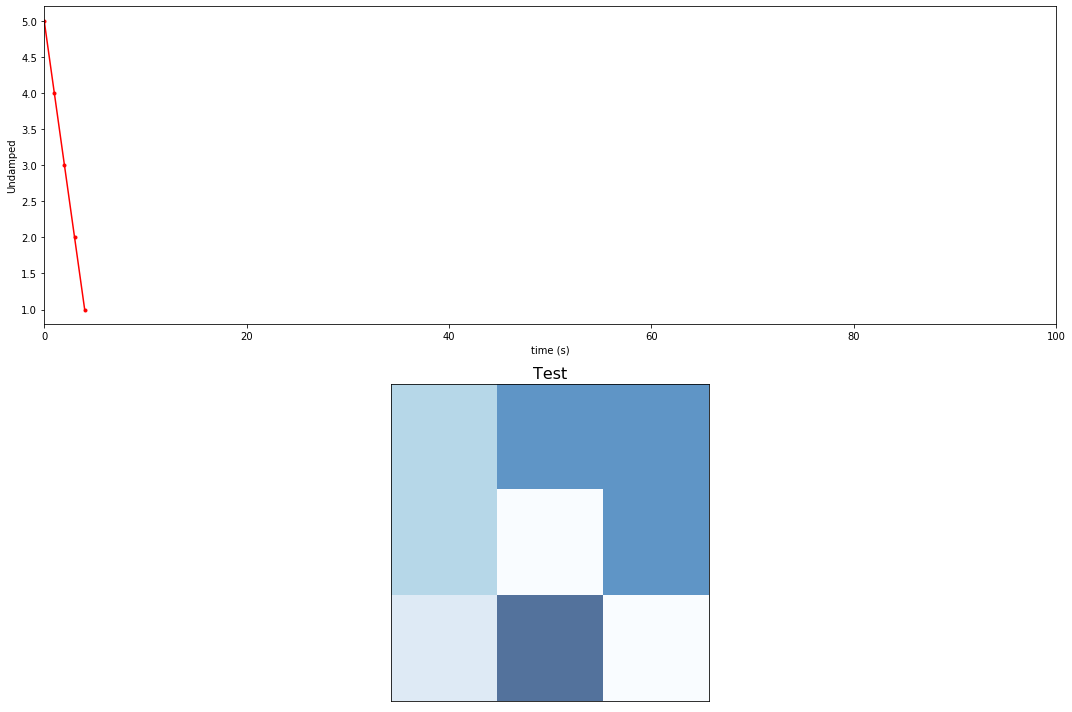

In [54]:
matrix = [[100,200,200], [100,0,200], [50, 250, 0]]
x = [0,1,2,3,4,5]
y = [5,4,3,2,1,0]


fig = plt.figure(figsize=(15,10)) 
plt.subplot(2, 1, 1)
plt.plot(x1, y1, 'r.-')
plt.xlim([0, 100])
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.tight_layout()

plt.subplot(2, 1, 2)
plt.title("Test", fontsize = 16)
plt.imshow(matrix, cmap='Blues', alpha=0.7, vmin = 0, vmax = 255)
plt.xticks([])
plt.yticks([])

plt.tight_layout()

plt.show()

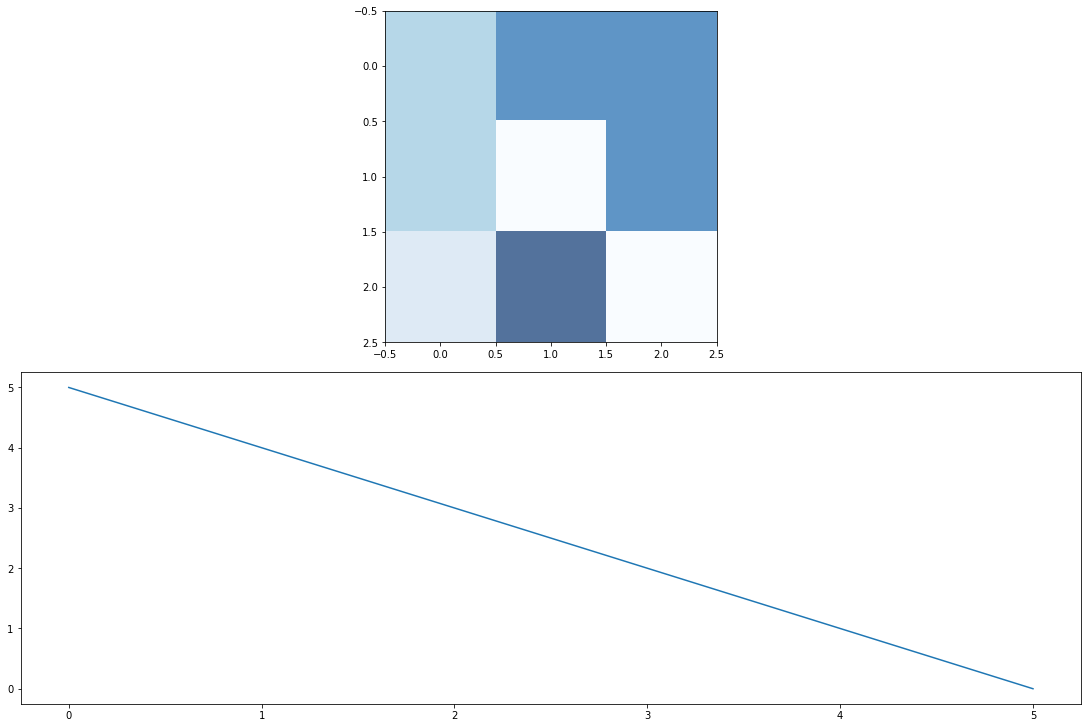

In [49]:
matrix = [[100,200,200], [100,0,200], [50, 250, 0]]


fig2 = plt.figure(figsize=(15,10),constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=1, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[1, 0])

f2_ax1.imshow(matrix, cmap='Blues', alpha=0.7, vmin = 0, vmax = 255)
f2_ax2(x,y)